In [ ]:
#  To mount the ipynb file if you are using the google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# pip install eli5

In [2]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\latjk\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
print(california.DESCR)  # Prints dataset description

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
X = X[['MedInc',	'HouseAge'	,'AveRooms',	'AveBedrms',	'Population',	'AveOccup']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Global explanation: permutation importance
perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)
weights = eli5.explain_weights_df(perm, feature_names=X.columns.tolist())

Permutation Importance is used to measure the impact of each feature on a trained model’s performance by randomly shuffling its values and checking how much the model error increases.

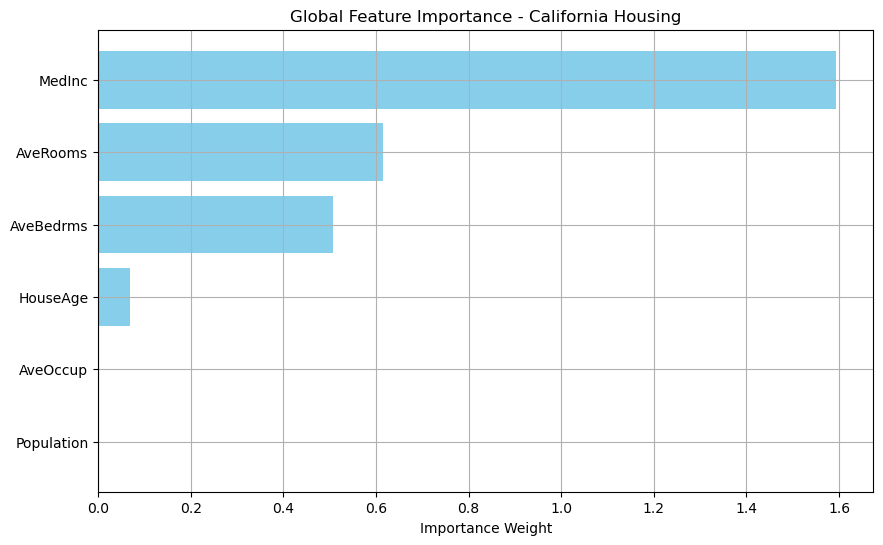

In [10]:
# Plot global feature importance
plt.figure(figsize=(10,6))
plt.barh(weights['feature'], weights['weight'], color='skyblue')
plt.xlabel('Importance Weight')
plt.title('Global Feature Importance - California Housing')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [11]:
# Local explanation for first test instance
instance_id = 0
sample = X_test.iloc[instance_id]
local_exp = eli5.explain_prediction_df(model, sample, feature_names=X.columns.tolist())

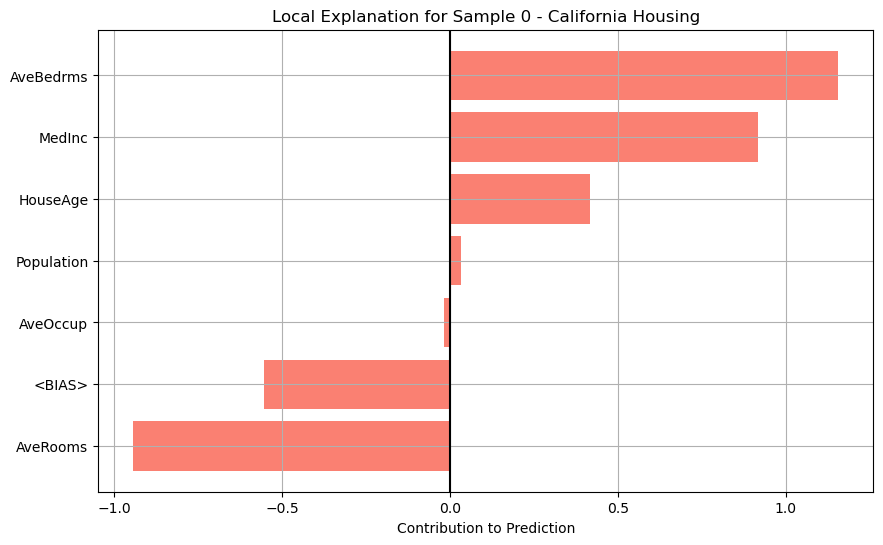

In [12]:
# Filter non-zero contributions
local_exp_nonzero = local_exp[local_exp['weight'] != 0]

# Plot local feature contributions
plt.figure(figsize=(10,6))
plt.barh(local_exp_nonzero['feature'], local_exp_nonzero['weight'], color='salmon')
plt.xlabel('Contribution to Prediction')
plt.title(f'Local Explanation for Sample {instance_id} - California Housing')
plt.axvline(0, color='black')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()